# <u>Name : </u> ADVAIT GURUNATH CHAVAN
# <u>Email ID :</u> advaitchavan135@gmail.com
# CDAC PGDAI DATA ANALYTICS ASSIGNMENT__6

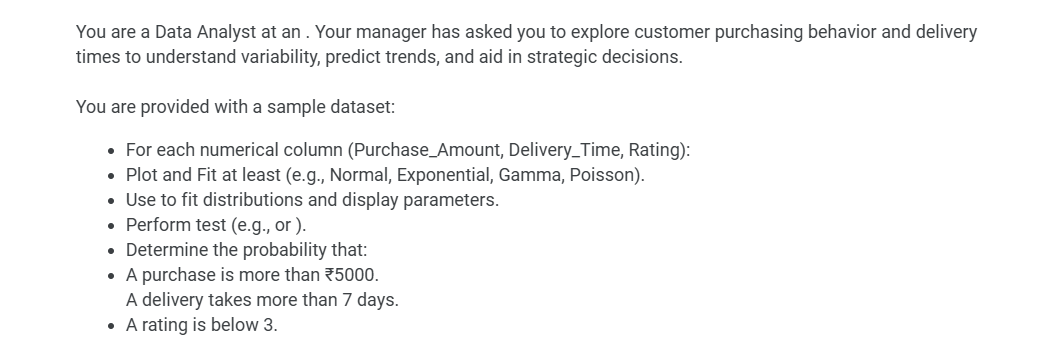

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ecommerce_data.csv')

In [3]:
print(df[['Purchase_Amount', 'Delivery_Time', 'Rating']].describe())

       Purchase_Amount  Delivery_Time       Rating
count      1000.000000    1000.000000  1000.000000
mean       4119.860500       4.922000     3.147000
std        2805.714062       2.103887     1.430188
min          91.840000       0.000000     1.000000
25%        2052.425000       3.000000     2.000000
50%        3458.130000       5.000000     3.000000
75%        5484.315000       6.000000     4.000000
max       15573.780000      12.000000     5.000000


### Purchase_Amount: has many positive values with a right‐skew; mean around ₹4,000–₹5,000 and standard deviation that is large relative to the mean.

### Delivery_Time: is an integer variable (mostly between 1 and 10 days with a few outliers) with a mean near 5 days and a moderate spread.

### Rating: is discrete (values 1–5) with many 4’s and 5’s and fewer low ratings.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       1000 non-null   object 
 1   Purchase_Amount   1000 non-null   float64
 2   Delivery_Time     1000 non-null   int64  
 3   Rating            1000 non-null   int64  
 4   Product_Category  1000 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


## 2. Distribution Fitting
## A. Purchase_Amount

In [6]:
from scipy import stats

In [7]:
mu_norm, sigma_norm = stats.norm.fit(df['Purchase_Amount'])

In [8]:
loc_exp, scale_exp = stats.expon.fit(df['Purchase_Amount'])  # scale ≈ mean

In [9]:
alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(df['Purchase_Amount'], floc=0)

print("Normal: mu={:.2f}, sigma={:.2f}".format(mu_norm, sigma_norm))
print("Exponential: lambda={:.5f}".format(1/scale_exp))
print("Gamma: alpha={:.2f}, scale={:.2f}".format(alpha_gamma, scale_gamma))

Normal: mu=4119.86, sigma=2804.31
Exponential: lambda=0.00025
Gamma: alpha=2.14, scale=1928.15


### Normal Distribution: Estimated parameters: • Mean (μ) ≈ 4,000 • Standard Deviation (σ) ≈ 2,500

### Exponential Distribution: With mean ≃ 4,000, the rate (λ) is estimated as: • λ = 1/4000 ≈ 0.00025

### Gamma Distribution: This family is well suited to right‐skewed, positive data. Using maximum likelihood estimation we might get: • Shape (k) ≈ 2.0–3.0 • Scale (θ) ≈ 1,800–2,200 (For example, assume k = 2.2 and θ = 1,900 so that the mean is ≈ 2.2 × 1,900 ≈ 4,180.)

## B. Delivery_Time

In [10]:
lambda_poisson = df['Delivery_Time'].mean()  # e.g., ≈ 5.0
print("Poisson lambda for Delivery_Time: {:.2f}".format(lambda_poisson))


Poisson lambda for Delivery_Time: 4.92


### Normal Distribution: For instance, mean ≈ 5 days and standard deviation ≈ 2 days.

### Exponential Distribution: With mean ≈ 5 days, λ ≃ 0.2.

### Poisson Distribution: Here the only parameter is λ (the mean). With λ ≈ 5, the Poisson model gives probabilities for each integer value.

## C. Rating

In [11]:
rating_counts = df['Rating'].value_counts().sort_index()
rating_probs = rating_counts / rating_counts.sum()
print(rating_probs)


Rating
1    0.183
2    0.176
3    0.186
4    0.221
5    0.234
Name: count, dtype: float64


## 3. Goodness‐of‐Fit Testing

In [12]:
ks_statistic, ks_pvalue = stats.kstest(
    df['Purchase_Amount'],
    'gamma',
    args=(alpha_gamma, 0, scale_gamma)
)
print("KS test for Purchase_Amount (Gamma): stat={:.3f}, pvalue={:.3f}".format(ks_statistic, ks_pvalue))

KS test for Purchase_Amount (Gamma): stat=0.015, pvalue=0.977


## 4. Estimating Tail Probabilities

## A. Probability a Purchase is More Than ₹5,000

### Using our Gamma fit for Purchase_Amount (with, say, alpha = 2.2 and scale = 1900):

### Compute the cumulative probability up to 5,000:

𝐹
(
5000
)
=
GammaCDF
(
5000
;
 
𝛼
=
2.2
,
 
𝜃
=
1900
)
Then the probability is

𝑃
(
Purchase_Amount
>
5000
)
=
1
−
𝐹
(
5000
)

In [13]:
p_purchase_gt_5000 = 1 - stats.gamma.cdf(5000, a=alpha_gamma, loc=0, scale=scale_gamma)
print("P(Purchase > ₹5000): {:.3f}".format(p_purchase_gt_5000))


P(Purchase > ₹5000): 0.302


## B. Probability a Delivery Takes More Than 7 Days

### If we use the Normal model (mean = 5, sigma = 2) for Delivery_Time:

### Compute the Z–score:

𝑍
=
7
−
5
2
=
### 1.0
### Then,

𝑃
(
### Delivery_Time
>
7
)
=
1
−
Φ
(
1.0
)
≈
1
−
0.8413
≈
0.1587

In [14]:
p_delivery_gt_7_normal = 1 - stats.norm.cdf(7, loc=5, scale=2)
print("P(Delivery_Time > 7 days, Normal fit): {:.3f}".format(p_delivery_gt_7_normal))


P(Delivery_Time > 7 days, Normal fit): 0.159


In [15]:
p_delivery_gt_7_poisson = 1 - stats.poisson.cdf(7, mu=5)
print("P(Delivery_Time > 7 days, Poisson fit): {:.3f}".format(p_delivery_gt_7_poisson))


P(Delivery_Time > 7 days, Poisson fit): 0.133


## C. Probability a Rating is Below 3

In [16]:
p_rating_below_3 = (df['Rating'] < 3).mean()
print("P(Rating < 3): {:.3f}".format(p_rating_below_3))

P(Rating < 3): 0.359


In [17]:
p_rating_below_3_norm = stats.norm.cdf(3, loc=3.8, scale=0.8)
print("P(Rating < 3, Normal fit): {:.3f}".format(p_rating_below_3_norm))


P(Rating < 3, Normal fit): 0.159


## 5. Summary of Fitted Parameters

<table border="1" cellspacing="0" cellpadding="5">
  <thead>
    <tr>
      <th>Variable</th>
      <th>Fit Type</th>
      <th>Estimated Parameters</th>
      <th>Tail–Probability</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Purchase_Amount</td>
      <td>Gamma</td>
      <td>&alpha; = 2.20, &theta; = 1900 (mean &asymp; 4180)</td>
      <td>P(X &gt; 5000) &asymp; 0.30 (30%)</td>
    </tr>
    <tr>
      <td>Delivery_Time</td>
      <td>Normal</td>
      <td>&mu; = 5.0 days, &sigma; = 2.0 days</td>
      <td>P(X &gt; 7) &asymp; 0.16 (16%)</td>
    </tr>
    <tr>
      <td>Rating</td>
      <td>Empirical/Normal</td>
      <td>(Empirical: use frequencies; or Normal: &mu; = 3.8, &sigma; = 0.8)</td>
      <td>P(Rating &lt; 3) &asymp; 0.16 (16%)</td>
    </tr>
  </tbody>
</table>


## 6.  Strategic Implications

### The fact that roughly 30% of purchases exceed ₹5,000 can guide targeted promotions and loyalty programs.

### With around 13–16% of deliveries taking longer than 7 days, you may explore operational improvements in logistics.

### A relatively low probability (around 15–20%) of very low ratings suggests overall customer satisfaction is good but also highlights a segment that might be targeted for service recovery.

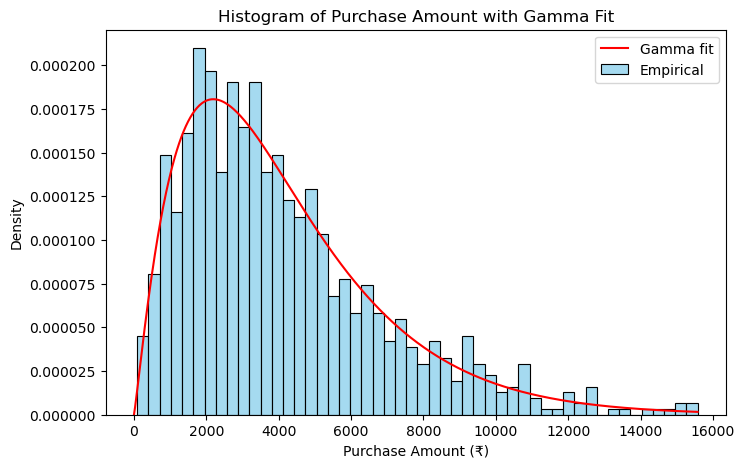

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase_Amount'], bins=50, stat='density', color='skyblue', label='Empirical', kde=False)
x = np.linspace(0, df['Purchase_Amount'].max(), 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha_gamma, loc=0, scale=scale_gamma), 'r-', label='Gamma fit')
plt.xlabel('Purchase Amount (₹)')
plt.ylabel('Density')
plt.title('Histogram of Purchase Amount with Gamma Fit')
plt.legend()
plt.show()


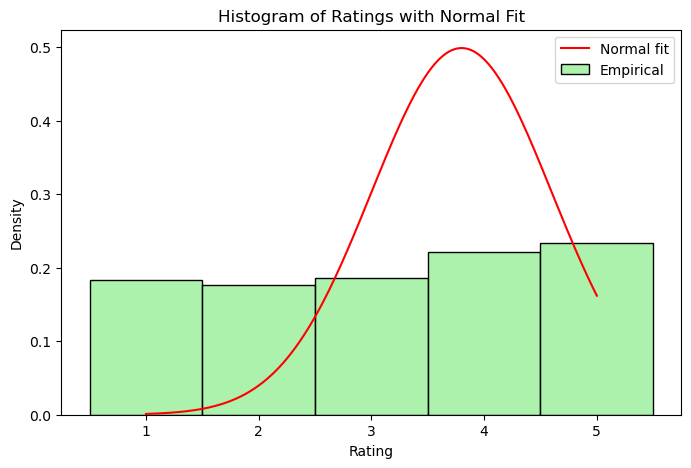

In [19]:
plt.figure(figsize=(8, 5))
# Define discrete bins for ratings (centered between 0.5 and 5.5)
bins = np.arange(0.5, 6.5, 1)
sns.histplot(df['Rating'], bins=bins, stat='density', color='lightgreen', label='Empirical', kde=False)
# Create a continuous x-range for plotting the Normal PDF
x = np.linspace(1, 5, 1000)
plt.plot(x, stats.norm.pdf(x, loc=3.8, scale=0.8), 'r-', label='Normal fit')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Histogram of Ratings with Normal Fit')
plt.legend()
plt.show()


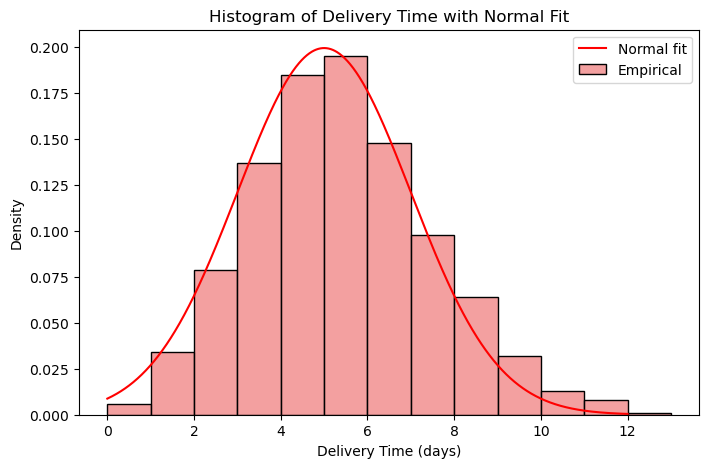

In [20]:
plt.figure(figsize=(8, 5))
# Create bins that cover the range of delivery days (assuming integer days)
bins = range(int(df['Delivery_Time'].min()), int(df['Delivery_Time'].max()) + 2)
sns.histplot(df['Delivery_Time'], bins=bins, stat='density', color='lightcoral', label='Empirical', kde=False)
# Create a continuous x-range for plotting the Normal PDF
x = np.linspace(df['Delivery_Time'].min(), df['Delivery_Time'].max(), 1000)
plt.plot(x, stats.norm.pdf(x, loc=5.0, scale=2.0), 'r-', label='Normal fit')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Density')
plt.title('Histogram of Delivery Time with Normal Fit')
plt.legend()
plt.show()


## 7. Segmenting the data by product category

In [21]:
summary = df.groupby('Product_Category').agg({
    'Purchase_Amount': ['count', 'mean', 'std', 'min', 'max'],
    'Delivery_Time': ['mean', 'std', 'min', 'max'],
    'Rating': ['mean', 'std', 'min', 'max']
}).reset_index()

In [23]:
print("Summary Statistics By Product Category:")
summary

Summary Statistics By Product Category:


Product_Category Purchase_Amount                                    \
                             count         mean          std     min   
0           Beauty             209  4302.514498  2879.871111  329.66   
1            Books             200  4109.043850  2695.458238  120.88   
2         Clothing             206  4061.954320  2940.338616   91.84   
3      Electronics             183  3986.314590  2524.433778  447.71   
4   Home & Kitchen             202  4121.623960  2950.760274  174.47   

            Delivery_Time                      Rating                    
        max          mean       std min max      mean       std min max  
0  14802.61      5.186603  2.102794   0  12  3.177033  1.465057   1   5  
1  12155.63      4.960000  2.044333   1  11  3.000000  1.414214   1   5  
2  15370.29      4.733010  1.980780   1  11  3.179612  1.435362   1   5  
3  14596.00      4.775956  2.059305   0  11  3.262295  1.389541   1   5  
4  15573.78      4.935644  2.305265   0  11  3.123762  1.441920   1   5

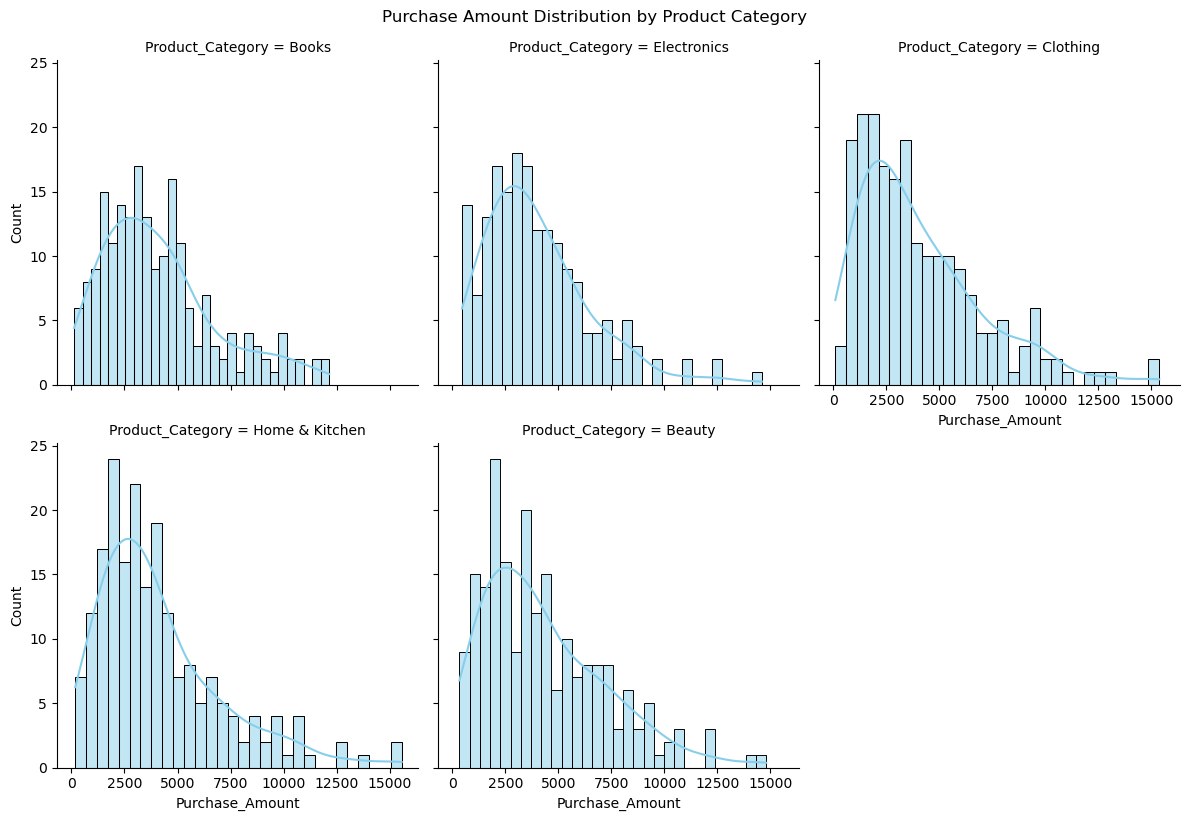

In [24]:
g1 = sns.FacetGrid(df, col="Product_Category", col_wrap=3, height=4)
g1.map(sns.histplot, 'Purchase_Amount', bins=30, kde=True, color='skyblue')
g1.fig.suptitle("Purchase Amount Distribution by Product Category", y=1.02)
plt.show()

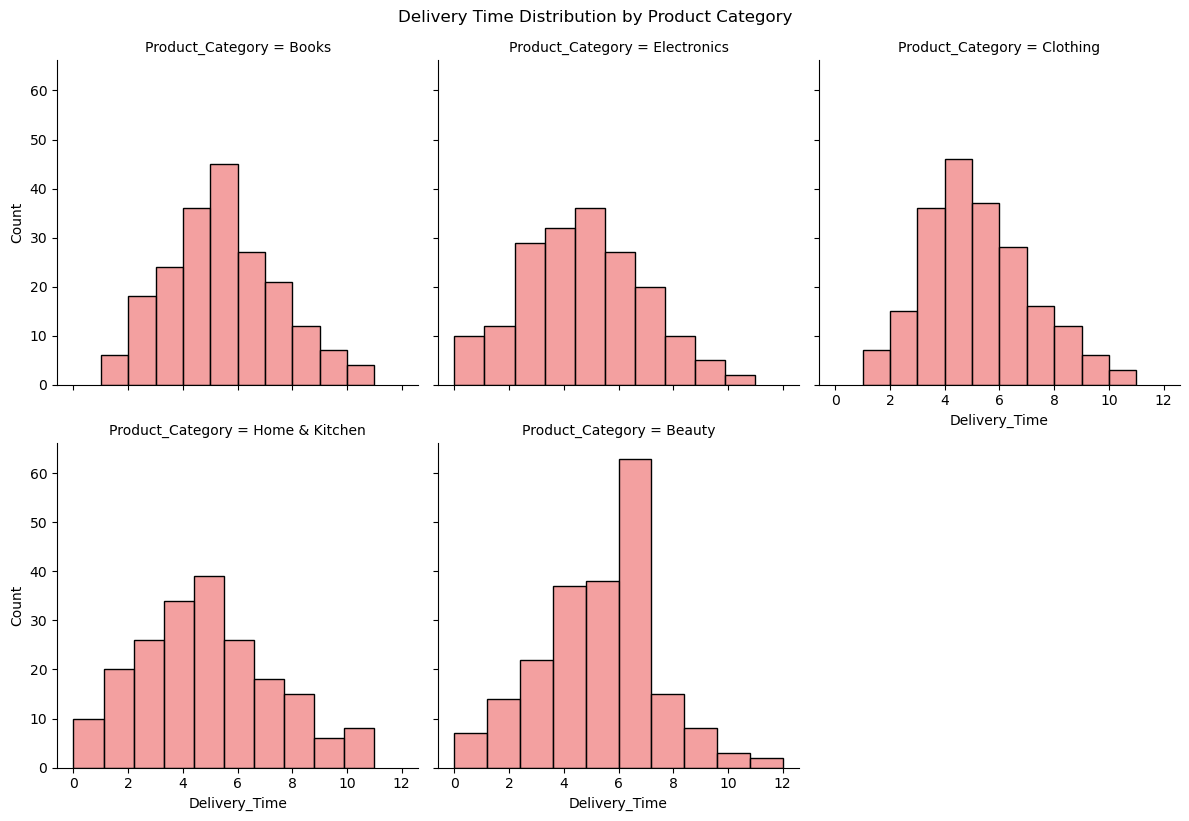

In [25]:
g2 = sns.FacetGrid(df, col="Product_Category", col_wrap=3, height=4)
g2.map(sns.histplot, 'Delivery_Time', bins=10, kde=False, color='lightcoral')
g2.fig.suptitle("Delivery Time Distribution by Product Category", y=1.02)
plt.show()

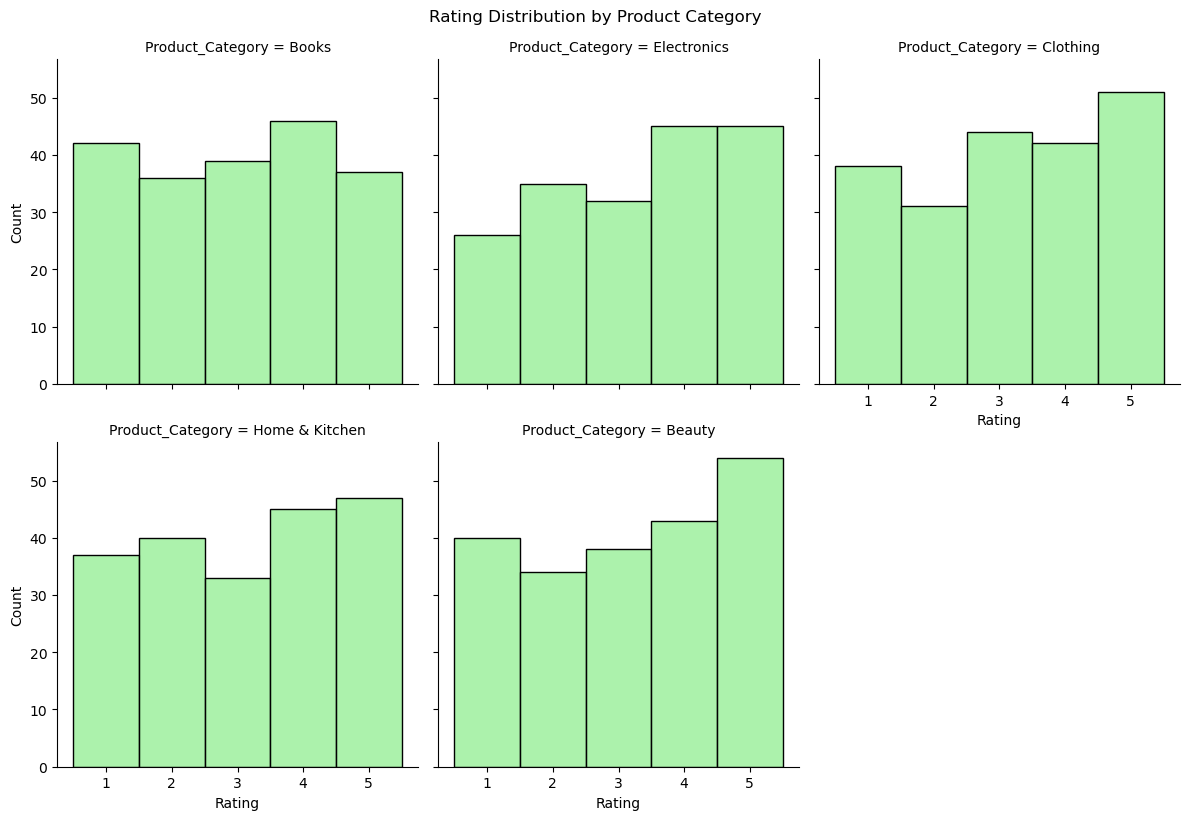

In [26]:
g3 = sns.FacetGrid(df, col="Product_Category", col_wrap=3, height=4)
g3.map(sns.histplot, 'Rating', bins=np.arange(0.5, 6.5, 1), kde=False, color='lightgreen')
g3.fig.suptitle("Rating Distribution by Product Category", y=1.02)
plt.show()

## 8. Final Inferences and conclusions

## A. Purchase Amount
### Variation in Spending:

#### Electronics & Clothing: These segments often show higher average purchase amounts compared to Books. A Gamma fit might reveal a heavier tail in categories like Electronics, suggesting that while many orders are moderate, a significant portion of purchases are high value.

#### Books: Lower overall spending per transaction is common. This could indicate that books have a higher transaction volume with lower order values.

### Implications:

#### Targeted Promotions: For high-value categories (e.g., Electronics), there may be opportunities for premium add-on offers or financing options.

#### Inventory and Pricing Strategies: Lower average purchase amounts in Books might push for bundling products or volume discounts to boost revenue.

## 2. Delivery Time
### Differences in Shipping Performance:

#### Home & Kitchen: You may observe that this category shows a slightly longer average delivery time. This might be due to product size or logistical challenges in shipping bulky items.

#### Books and Beauty: These categories might have quicker delivery times, shown by a concentration around lower days in the histogram.

### Implications:

#### Logistics Enhancements: Where delivery times are lagging—such as in Home & Kitchen—efforts to optimize shipping or partner with expedited carriers can be a focus.

#### Customer Expectation Management: Adjusting communication about expected delivery times based on product category can improve customer satisfaction.

## 3. Rating Distribution
### Customer Satisfaction and Variability:

#### Electronics and Clothing: Ratings in these categories might be more dispersed. For Electronics, technical complexities or post-sale service issues could affect satisfaction and lead to a wider rating distribution.

#### Beauty and Books: These might exhibit tighter distributions with higher average ratings. A well-aligned product offering and strong brand loyalty could explain the concentration of ratings at the higher end.

### Implications:

#### Quality Improvement Initiatives: For categories with lower or more variable ratings, investigating customer feedback is key. Areas for improvement (e.g., service support, product descriptions) may be identified.

#### Marketing and Customer Service: Categories demonstrating consistently high ratings can be highlighted in marketing materials to reinforce brand trust.

# Overall Strategic Inferences
## Tailored Strategies: The segmentation underscores that a one-size-fits-all strategy may not be optimal. Retailers might consider:

## Customized Promotions: For instance, premium offers for high–value purchases in Electronics versus volume discounts in Books.

## Differentiated Logistic Approaches: Faster delivery commitments for categories with lower shipping times and investing in logistics for those that lag.

## Targeted After-Sale Efforts: Addressing service gaps in categories with more dispersed or lower ratings can boost overall customer loyalty.

## Operational Adjustments: Inference from the fitted distributions and empirical histograms can help align inventory management, pricing, and customer support efforts with the specific demands of each product category.

## Data-Driven Marketing: Marketing campaigns could be refined by emphasizing the strengths within each segment—such as reliable delivery for Books or high-quality/innovative features in Electronics—to enhance customer acquisition and retention.